# Imports

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv,time

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F 

import pandas as pd
import seaborn as sns

import gym
from bs4 import BeautifulSoup

from sklearn import datasets
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
sns.set()

# Load and preprocess data

In [2]:
rootpath = '..\\..\\TF_data\\STOCKDATA\\Data\\Stocks\\'
available_indices = os.listdir(rootpath)

# Determine earning potential for S&P 500

In [3]:
bf = pd.read_csv('..\\..\\TF_data\\STOCKDATA\\Data\\Markets\\S&P500.csv',usecols=['Date','Open']).set_index('Date')

In [4]:
bf['+3M - Open'] = bf['Open'].shift(-3)
bf['+3M - Revenue'] = bf.apply(lambda x: x['+3M - Open']-x['Open'],axis=1)

In [5]:
bf['+12M - Open'] = bf['Open'].shift(-12)
bf['+12M - Revenue'] = bf.apply(lambda x: x['+12M - Open']-x['Open'],axis=1)

In [6]:
bf['+24M - Open'] = bf['Open'].shift(-24)
bf['+24M - Revenue'] = bf.apply(lambda x: x['+24M - Open']-x['Open'],axis=1)

In [7]:
bf = bf.drop(columns=['+3M - Open','+12M - Open','+24M - Open']).dropna(axis=0)

# Determine earning potential for stock

In [9]:
df = pd.read_csv(rootpath+available_indices[12],usecols=['Date','Open']).set_index(['Date'])

In [10]:
df['+3M - Open'] = df['Open'].shift(-3)
df['+3M - Revenue'] = df.apply(lambda x: x['+3M - Open']-x['Open'],axis=1)

In [11]:
df['+12M - Open'] = df['Open'].shift(-12)
df['+12M - Revenue'] = df.apply(lambda x: x['+12M - Open']-x['Open'],axis=1)

In [12]:
df['+24M - Open'] = df['Open'].shift(-24)
df['+24M - Revenue'] = df.apply(lambda x: x['+24M - Open']-x['Open'],axis=1)

In [13]:
df = df.drop(columns=['+3M - Open','+12M - Open','+24M - Open'])

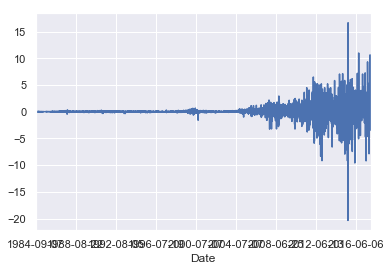

In [14]:
df['+3M - Revenue'].plot()

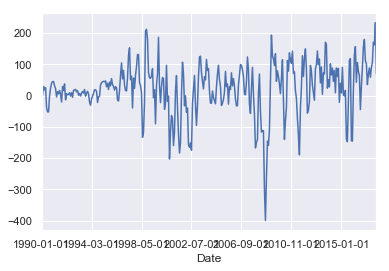

In [15]:
bf['+3M - Revenue'].plot()